In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, shutil, sys, re
import math

from scipy.spatial import Voronoi, cKDTree
from scipy import spatial

from matplotlib import patches


# Defining data files and parameters

In [2]:
baseDataDir = '../../../experimentData/PointDistributionData/Homogeneity_examples/'
qrngData_single = np.loadtxt(baseDataDir+"qrng_single_2Dcoordinates_50K.lst", usecols=[0,1], delimiter=',')

prngData_single = np.loadtxt(baseDataDir+"prng_single_2Dcoordinates_50K.lst", usecols=[0,1], delimiter=',')

groups = 50;
figsize=(6,5)

SubSet_N = 1;
def compute_discrepancies(subset):
    # Create a KDTree from the points
    kdtree = cKDTree(subset)
    # Find the nearest neighbor for each point in the set, excluding the point itself
    nearest_neighbors = kdtree.query(subset, k=2)[0][:, 1]
    return nearest_neighbors


def closest_node(node, kdtree):
    _, min_idx = kdtree.query(node)
    nearest_node = kdtree.data[min_idx]
    deltas = nearest_node - node
    dist = np.linalg.norm(deltas)
    return nearest_node, dist, deltas[1] / deltas[0]

def circleWithinBounds(point, radius, maxBound, minBound):
    #maxBound = hull.max_bound
    isWithinXboundaries = ( point[0]-radius >= minBound[0] and point[0]+radius <= maxBound[0])
    isWithinYboundaries = ( point[1]-radius >= minBound[1] and point[1]+radius <= maxBound[1])
    #minBound = hull.min_bound
    return isWithinXboundaries and isWithinYboundaries

def largest_circle_radius(subset,kdtree):
    vor = spatial.Voronoi(subset)
    max_d = 0
    for v in vor.vertices:
        _, d, _ = closest_node(v, kdtree)
        if d > max_d and circleWithinBounds(v, d, [1,1],[0,0]): #pointWithinBounds(v, [1,1], [0,0]):
            max_d = d
    return max_d

def largest_distance(points, kdtree):
    # Find the nearest neighbor for each point (excluding itself)
    distances, indices = kdtree.query(points, k=2)
    
    # Extract the nearest neighbor distances
    nearest_distances = distances[:, 1]
    
    # Find the point with the largest minimum distance
    max_index = np.argmax(nearest_distances)
    
    return nearest_distances, points[max_index], nearest_distances[max_index]

# QRNG plot

In [3]:
print("QRNG points, 1K")

subsets = np.split(qrngData_single, groups)
points = subsets[SubSet_N]

kdtree = cKDTree(points)

QRNG points, 1K


## Find the point with the largest minimum distance to others

In [4]:
discrepancies, max_dist_point, max_dist_value = largest_distance(points, kdtree)

## Find the largest radius for a circle that can be placed

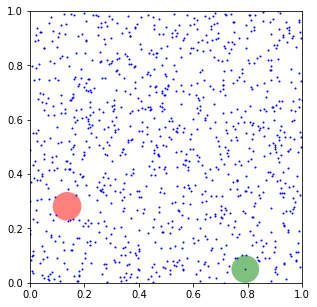

In [5]:
max_d_new = largest_circle_radius(points, kdtree)

if points.shape[0] >= 4:
    vor = Voronoi(points)
    max_v_new = None
    for v in vor.vertices:
        _, d, _ = closest_node(v, kdtree)
        if d >= max_d_new and circleWithinBounds(v, d, [1,1], [0,0]):
            max_d_new = d
            max_v_new = v


fig = plt.figure(figsize=figsize)
ax = fig.gca()
circ_LES = patches.Circle( max_v_new, max_d_new, alpha=0.5,facecolor='r')

circ_NN = patches.Circle( max_dist_point, max_dist_value, alpha=0.5,facecolor='g')


ax.scatter(points[:,0], points[:,1], color='b', marker='o', s=1)
ax = plt.gca()  # Get the current axes
ax.add_patch(circ_LES)
ax.add_patch(circ_NN)
ax.set_aspect('equal')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

fig.savefig("qrng_single_1K.png")

# PRNG plot

PRNG points, 1K


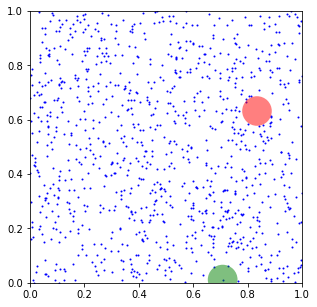

In [6]:
print("PRNG points, 1K")

subsets = np.split(prngData_single, groups)
points = subsets[SubSet_N]

kdtree = cKDTree(points)

# Find the point with the largest minimum distance to others
discrepancies, max_dist_point, max_dist_value = largest_distance(points, kdtree)

# Find the largest radius for a circle that can be placed
max_d_new = largest_circle_radius(points, kdtree)

if points.shape[0] >= 4:
    vor = Voronoi(points)
    max_v_new = None
    for v in vor.vertices:
        _, d, _ = closest_node(v, kdtree)
        if d >= max_d_new and circleWithinBounds(v, d, [1,1], [0,0]):
            max_d_new = d
            max_v_new = v


fig = plt.figure(figsize=figsize)
ax = fig.gca()
circ_LES = patches.Circle( max_v_new, max_d_new, alpha=0.5,facecolor='r')

circ_NN = patches.Circle( max_dist_point, max_dist_value, alpha=0.5,facecolor='g')


ax.scatter(points[:,0], points[:,1], color='b', marker='o', s=1)
ax.add_patch(circ_LES)
ax.add_patch(circ_NN)
ax.set_aspect('equal')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1]) 
fig.savefig("prng_single_1K_9.png")